<a href="https://colab.research.google.com/github/Subhasishbasak/NLP/blob/master/Word_recognition_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Natural_Language_Processing/Assignment_2/MDS201803

Link to the documentation [Click here](https://drive.google.com/open?id=1eEH_WuUeuXkzcQBBJsc9YKwdVAPzPJYn)

In [0]:
# Basic Imports

import numpy as np
import string
import matplotlib.pyplot as plt

In [0]:
vocabulary = ["about", "above","abuse","added","adult","after","again","agent","agree",
             "beach", "began", "begin", "being", "below", "bible", "bills", "birds", "birth",
             "calls", "cards", "carry", "cases", "catch", "cause", "cells", "chain", "chair",
             "dates", "death", "depth", "doing", "doors", "doubt", "draft", "drawn","dream",
             "eight", "email", "empty", "ended", "enemy", "enjoy", "enter", "entry", "equal",
             "facts", "faith", "feels", "fewer", "field", "fifth", "fight", "filed", "files",
             "gifts", "girls", "given", "gives", "glass", "goals", "going", "goods", "grade",
             "hands", "happy", "heads", "heard", "heart", "heavy", "hello", "helps", "hence",
             "ideal", "ideas", "image", "index", "inner", "input", "issue", "items", "joint",
             "judge", "juice", "keeps", "kinds", "knife", "known", "knows", "label", "labor",
             "large", "later", "layer", "leads", "learn", "least", "leave", "legal", "level",
             "magic", "major", "makes", "match", "maybe", "meals", "means", "meant", "media",
             "never", "newly", "night", "noise", "north", "noted", "notes", "nurse", "occur",
             "older", "opens", "order", "other", "owned", "owner", "pages", "paint","panel", "paper", "parks"]

#### One Hot Encoding

In [0]:
# Function for generating One-Hot vector encoding of the English words & Alphabets

def one_hot_encode(w):
    
    output = np.zeros(26)
    test_list = list(string.ascii_lowercase) 
    
    for i in list(w):
        index = test_list.index(i)
        output[index] = output[index] + 1
    
    # takes the average of the one hot vectors of each alphabet of the word
    output = output/5
    
    return output

#### Creating the Input matrix of shape $128 \times 26$

In [0]:
# The following code stacks all the input One hot vectors and constructs the input matrix

X = None
for i in vocabulary:
    x = one_hot_encode(i)
    try:
        X = np.row_stack([X, x])
    except ValueError:
        X = x

#### Creating the output matrix of shape $128 \times 128$

In [0]:
y = np.identity(128)

In [0]:
# This function learns parameters for the neural network and returns the model.

#  iterations : Number of passes through the training data for gradient descent
#  print_loss: If True, print the loss every 1000 iterations

def Neural_network(hidden_dim, iterations):
    
    input_dim = 26           # input layer dimensionality
    hidden_dim = 10          # hidden layer dimensionality
    output_dim = 128         # output layer dimensionality

    # parameters Gradient descent 

    eta = 0.01           # learning rate for gradient descent

    # First we initialize the parameters to random values. 
    np.random.seed(0)
    W1 = np.random.randn(input_dim, hidden_dim)    # First weight matrix of shape 26 x 10 
    b1 = np.zeros((1, hidden_dim))                 # bias vector of shape 10 x 1
    W2 = np.random.randn(hidden_dim, output_dim)   # Second weight matrix of shape 10 x 128
    b2 = np.zeros((1, output_dim))                 # bias vector of shape 128 x 1

    # We build the Neural Network model as a dictionary storing the parameters (Weights & Biases respectively)
    param_dict = {}

    # We use the Gradient descent algorithm to estimate the parameters by updating each batch
    for i in range(0, iterations):

        # Forward propagation
        
        z1 = X.dot(W1) + b1          # z1 obtained by multiplyng weight W1 and adding bias b1 with input
        a1 = np.tanh(z1)             # a1 obtained after applying tanh() activation to z1
        z2 = a1.dot(W2) + b2         # z2 obtained by multiplyng weight W2 and adding bias b2 with a1
        exp_scores = np.exp(z2)           
        sftmax = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)  # softmax scores to generate probabilities

        # Backpropagation
        
        delta3 = sftmax - y            # taking difference of observed any predicted node values
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # Gradient descent parameter update
        
        W1 = W1 - eta * dW1
        b1 = b1 - eta * db1
        W2 = W2 - eta * dW2
        b2 = b2 - eta * db2

        # Updating the model with new parameters
        
        param_dict = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

    return param_dict
                  

In [0]:
# Function to predict the output

def predict(param_dict, x):
    
    # takes the weights and biases from the trained model
    
    W1, b1, W2, b2 = param_dict['W1'], param_dict['b1'], param_dict['W2'], param_dict['b2']
    
    # Forward propagation
    
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    
    return np.argmax(probs, axis=1)

#### Training the model

In [0]:
model = Neural_network(10, 500)

Using the accuracy function we compute the accuracy of the trained model.

In [0]:
# Function to compute the accuracy of the model
# To check Training accuracy keep, train = True
# To check Test accuracy keep, train = False, test = input dictionary
# To print the false positive results keep the "print_false" flag on

def accuracy(model, train = True, test = None, print_false = True):

    if train:
        count = 0
        for i in vocabulary:
            if predict(model, one_hot_encode(i))[0] == vocabulary.index(i):
                count += 1
            else:
                if print_false:
                    print("input word : %s, predicted word : %s, predicted index : %i, actual index : %i" %(i, vocabulary[predict(model, one_hot_encode(i))[0]], predict(model, one_hot_encode(i))[0], vocabulary.index(i)))
        return count/len(vocabulary)
        
    else:
        count = 0
        for i in list(test.keys()):
            if vocabulary[predict(model, one_hot_encode(i))[0]] == test[i]:
                count += 1
                if print_false:
                    print("input word : %s, predicted word : %s, expected word : %s, CORRECT PREDICTION" %(i, vocabulary[predict(model, one_hot_encode(i))[0]], test[i]))
            else:
                if print_false:
                    print("input word : %s, predicted word : %s, expected word : %s" %(i, vocabulary[predict(model, one_hot_encode(i))[0]], test[i]))
            
        return count/len(list(test.keys()))
    
                  

In [0]:
# This function is used to plot the accuracy values corresponding the iteration values
# This function finds the iteration size for which the two consecutive accuracies differ no more than 0.00001 such that
# the accuracy is at least greater than some threshold or iteration number is less than some threshold

def plot_accuracy(hdim , max_acc = 0.99, max_iter = 2500):
    
    acc_list = []
    itr_list = []
    iteration = 1
    acc_1 = accuracy(Neural_network(hdim, iteration), train = True, print_false= False)
    acc_2 = accuracy(Neural_network(hdim, iteration + 50), train = True, print_false= False)

    while abs(acc_1-acc_2)>0.00001 or acc_1 < 0.99 and iteration < 2500:

        iteration += 50
        acc_1 = accuracy(Neural_network(hdim, iteration), train = True, print_false= False)
        acc_2 = accuracy(Neural_network(hdim, iteration + 50), train = True, print_false= False)
        acc_list.append(acc_1)
        itr_list.append(iteration)
        
    print("accuracy achieved : ",acc_1)
    print("best iteration :", iteration) 
    
    return acc_list, itr_list

In [0]:
accuracy_list, iteration_list = plot_accuracy(10)

accuracy achieved :  0.984375
best iteration : 2501


Thus we see that the best accuracy achieved after 2500 iteration (i.e. 2500 batch gradiant descent updates) is $98.43 \%$

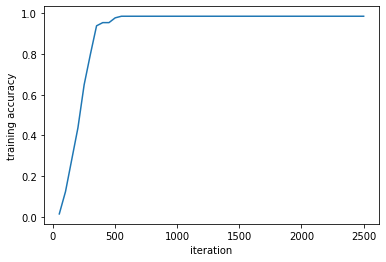

In [0]:
# Plotting Training accuracy w.r.t iteration 

fig = plt.figure()
plt.xlabel("iteration")
plt.ylabel("training accuracy")
plt.plot(iteration_list,accuracy_list, '-')


From above we can see that the accuracy improves till $500$ iterations and almost stops improving after $700-1000$ iterations. This graph helps us to identify a suitable iteration value.

In [0]:
accuracy(model, train = True)

input word : being, predicted word : begin, predicted index : 11, actual index : 12
input word : field, predicted word : filed, predicted index : 52, actual index : 49
input word : ideas, predicted word : ended, predicted index : 39, actual index : 73


0.9765625

We train the Neural Network with $10$ nodes in the hidden layer and for $500$ iterations. After some trial and parameter tuning we found that the training accuracy of the model is $97.65 \%$. The words it misclassifies are as above. 

#### Model Testing with mis-spelled words

In [0]:
test_dict = {"ajent" : "agent",
             "abouu" : "about", 
             "indes" : "index", 
             "abain" : "again", 
             "layer" : "later", 
             "aappy" : "happy",
             "march" : "match",
             "majik" : "magic",
             "layre" : "layer",
             "gless" : "glass",
             "billo" : "bills",
             "other" : "othre",
             "juict" : "juice",
             "feelz" : "feels",
             "knofe" : "knife"}

In [0]:
accuracy(model, train = False, test = test_dict)

input word : ajent, predicted word : paint, expected word : agent
input word : abouu, predicted word : about, expected word : about, CORRECT PREDICTION
input word : indes, predicted word : field, expected word : index
input word : abain, predicted word : again, expected word : again, CORRECT PREDICTION
input word : layer, predicted word : layer, expected word : later
input word : aappy, predicted word : happy, expected word : happy, CORRECT PREDICTION
input word : march, predicted word : match, expected word : match, CORRECT PREDICTION
input word : majik, predicted word : again, expected word : magic
input word : layre, predicted word : layer, expected word : layer, CORRECT PREDICTION
input word : gless, predicted word : girls, expected word : glass
input word : billo, predicted word : bills, expected word : bills, CORRECT PREDICTION
input word : other, predicted word : other, expected word : othre
input word : juict, predicted word : juice, expected word : juice, CORRECT PREDICTION
in

0.6

As we can see our trained model is able to predict the correct words for the mis-spelled inputs. We used a test dataset of size $15$ mis-spelled words. The test accuracy obtained was $60 \%$. 